In [4]:
import numpy as np
from helpers import *
from implementations import *

In [3]:
# loading train data (takes 10 secs, avoid spamming cell)

yb, input_data, ids = load_csv_data("train.csv")
dimensions = np.shape(input_data)
N = dimensions[0]
P = dimensions[1]

In [5]:
# standardize data without the incomplete points, calculations done on _rem arrays (with -999 lines removed)
idx_incomplete_points = np.nonzero(input_data[:,4]==-999)

tx_rem = np.delete(input_data,idx_incomplete_points,0)
y_rem = np.delete(yb,idx_incomplete_points)

means = np.mean(tx_rem, axis=0)
means = means * np.ones(np.shape(tx_rem))
tx_rem_std = tx_rem - means

std_dev = np.std(tx_rem, axis=0)
std_dev = std_dev * np.ones(np.shape(tx_rem))
tx_rem_std = tx_rem_std / std_dev       # np.mean(tx_rem_std) should be ~0, np.std(tx_rem_std) should be 1


In [6]:
np.shape(tx_rem_std)
np.mean(tx_rem_std)



9.680507705906368e-17

In [7]:
tx_test = tx_rem_std[range(1000),:]  # 100x30 data for faster testing of regression
y_test = yb[0:1000]
y_test = np.reshape(y_test, [1000,1])
print(y_test)
y_test[y_test==-1]= 0
yb[yb==-1] = 0
print(y_test)
# generate random indices
ratio = 0.2
num_row = len(y_test)
indices = np.random.permutation(num_row)
index_split = int(np.floor(ratio * num_row))
index_tr = indices[: index_split]
index_te = indices[index_split:]
# create split
x_tr = tx_test[index_tr]
x_te = tx_test[index_te]
y_tr = y_test[index_tr]
y_te = y_test[index_te]
print(y_te)

[[ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]

In [8]:
initial_w = np.ones([30,1])
max_iters = 100
gamma = 0.7
w_opt,loss = logistic_regression(y_test,tx_test,initial_w,max_iters,gamma)
w_opt2,loss2 = reg_logistic_regression(y_test, tx_test, 0.00014, initial_w, max_iters, gamma)

In [9]:
np.shape(initial_w)

(30, 1)

In [10]:
np.shape(w_opt)

(30, 1)

In [11]:
print(loss)
print(loss2)

0.6802788703131705
0.6802642245125924


In [12]:
#w_opt,loss = logistic_regression(y_rem,tx_rem_std,initial_w,max_iters,gamma)

For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00014 with a test rmse of 0.677
0.6773797152912481


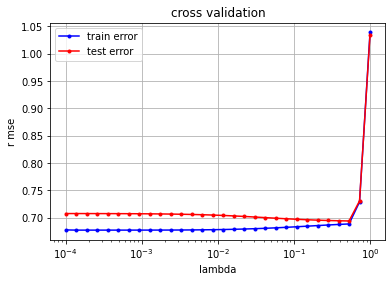

In [13]:
initial_w = np.ones([30,1])
max_iters = 70
gamma = 0.7
best_lambda, best_rmse = cross_validation_demo(y_test, tx_test, 7, 4,initial_w,  np.logspace(-4, 0, 30), 3 ,gamma, max_iters )
print(best_rmse)

In [23]:
best_degree_selection(y_test,tx_test,np.arange(2,11), 4, np.logspace(-2, 0, 50),  initial_w, gamma,max_iters)


/Users/toye/Desktop/ML_project1/implementations.py:241: RuntimeWarning: divide by zero encountered in log
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )
/Users/toye/Desktop/ML_project1/implementations.py:241: RuntimeWarning: invalid value encountered in matmul
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )
/Users/toye/Desktop/ML_project1/implementations.py:225: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))


2